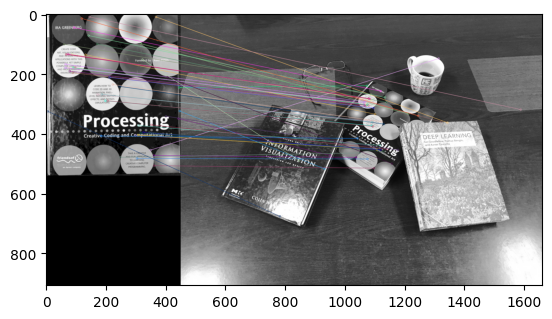

In [3]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기
img1 = cv2.imread('book.png', 0)  # queryImage 
img2 = cv2.imread('books.jpg', 0)  # trainImage

# 이미지가 제대로 읽혔는지 확인
if img1 is None or img2 is None:
    print("이미지를 불러올 수 없습니다. 경로를 확인하세요.")
else:
    # SIFT detector 생성
    sift = cv2.SIFT_create()

    # 키포인트와 디스크립터 계산
    kp1, des1 = sift.detectAndCompute(img1, None) 
    kp2, des2 = sift.detectAndCompute(img2, None)

    # BFMatcher 객체 생성
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # Match descriptors.
    matches = bf.match(des1, des2)

    # 거리 기준으로 정렬
    matches = sorted(matches, key = lambda x: x.distance)

    # 결과 이미지 그리기
    img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

    # OpenCV는 기본적으로 이미지를 BGR로 읽음 -> RGB로 변환 후 표시
    img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

    # 결과 이미지 표시
    plt.imshow(img3_rgb)
    plt.show()
